# 8. Neural networks and deep learning


This week, we´ll learn about neural nets and build a model for classifying images of clothes.


## 8.1 Fashion classification


Dataset:

- Full: [https://github.com/alexeygrigorev/clothing-dataset](https://github.com/alexeygrigorev/clothing-dataset)
- Small: [https://github.com/alexeygrigorev/clothing-dataset-small](https://github.com/alexeygrigorev/clothing-dataset-small)

Links:

- [https://cs231n.github.com](https://cs231n.github.com)


In [1]:
# !git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

## 8.1b SaturnCloud


Link:
[https://bit.ly/saturn-mlzoomcamp](https://bit.ly/saturn-mlzoomcamp)

- **Register**
- **Secrets** -> New -> add private key and secrets
- in terminal:

```bash
cd ~/.ssh
ls
```

- copy the private key as value
- add new line at the end
- **Resources** -> TensorFlow template -> create
- **Edit** -> pip install scipy and save
- add secret file to the project
- change file path to `/home/jovyan/.ssh/default`
- clone data from github


## 8.2 TensorFlow and Keras


- Installing TensorFlow
- Loading images


In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# !pip install tensorflow

In [4]:
# !conda install tensorflow -y

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from keras.preprocessing.image import load_img

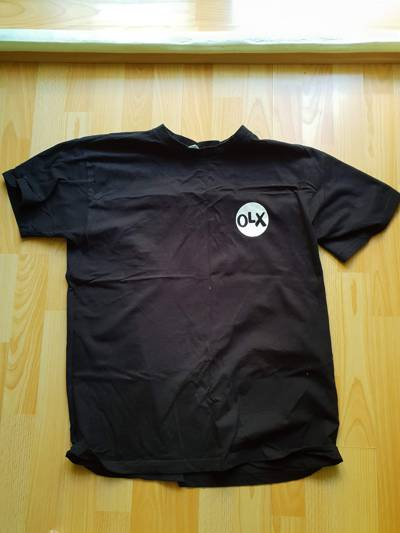

In [5]:
path = "./clothing-dataset-small/train/t-shirt"
name = "5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg"
fullname = f"{path}/{name}"
load_img(fullname)

In [6]:
img = load_img(fullname, target_size=(299, 299))

In [7]:
x = np.array(img)
x.shape

(299, 299, 3)

## 8.3 Pre-trained convolutional neural networks


- Imagenet dataset: [http://www.image-net.org](http://www.image-net.org)
- Pre-trained models: [https://keras.io/applications](https://keras.io/applications)


In [8]:
from keras.applications.xception import Xception, preprocess_input, decode_predictions

In [9]:
model = Xception(weights="imagenet", input_shape=(299, 299, 3))

2024-09-23 02:08:06.727798: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-09-23 02:08:06.727849: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-09-23 02:08:06.727863: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-09-23 02:08:06.727928: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-23 02:08:06.727956: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
X = np.array([x])

In [11]:
X = preprocess_input(X)

In [12]:
pred = model.predict(X)

2024-09-23 02:08:16.722573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step


In [13]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.68196386),
  ('n02916936', 'bulletproof_vest', 0.038139876),
  ('n04370456', 'sweatshirt', 0.034324747),
  ('n03710637', 'maillot', 0.011354209),
  ('n04525038', 'velvet', 0.0018453568)]]

Imagenet has no categorie for t-shirt. 🤨
We need to train a different model with the classes we have, but we can use the pre-trained model.


## 8.4 Convolutional neural networks


- Types of layers: convolutional and dense
- Convolutional layers and filters
- Dense layers

There are more layers. Read here: [https://cs231n.github.io/](https://cs231n.github.io/)


## 8.5 Transfer learning


- Reading the data with `ImageDataGenerator`
- Train `Xception` on smaller images (150x150)

(Better to run with a GPU)


In [14]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [16]:
train_ds = train_gen.flow_from_directory(
    "./clothing-dataset-small/train", target_size=(150, 150), batch_size=32
)

Found 3068 images belonging to 10 classes.


In [17]:
# print only folder names in bash
!ls ./clothing-dataset-small/train

dress      longsleeve pants      shoes      skirt
hat        outwear    shirt      shorts     t-shirt


In [18]:
X, y = next(train_ds)

In [19]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [20]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    "./clothing-dataset-small/validation",
    target_size=(150, 150),
    batch_size=32,
    shuffle=False,
)

Found 341 images belonging to 10 classes.


In [22]:
base_model = Xception(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)
preds = model.predict(X)

1/1 [==============================] - 2s 2s/step


In [23]:
learning_rate = 0.001
optimizer = keras.optimizers.legacy.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [24]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 25s 234ms/step - loss: 1.0810 - accuracy: 0.6437 - val_loss: 0.6930 - val_accuracy: 0.7771
Epoch 2/10
96/96 [==============================] - 21s 223ms/step - loss: 0.6276 - accuracy: 0.7862 - val_loss: 0.6244 - val_accuracy: 0.7947
Epoch 3/10
96/96 [==============================] - 21s 221ms/step - loss: 0.5095 - accuracy: 0.8289 - val_loss: 0.5933 - val_accuracy: 0.7977
Epoch 4/10
96/96 [==============================] - 21s 221ms/step - loss: 0.4295 - accuracy: 0.8563 - val_loss: 0.5586 - val_accuracy: 0.8182
Epoch 5/10
96/96 [==============================] - 21s 222ms/step - loss: 0.3715 - accuracy: 0.8830 - val_loss: 0.5391 - val_accuracy: 0.8094
Epoch 6/10
96/96 [==============================] - 21s 221ms/step - loss: 0.3286 - accuracy: 0.9038 - val_loss: 0.5307 - val_accuracy: 0.8152
Epoch 7/10
96/96 [==============================] - 21s 222ms/step - loss: 0.2870 - accuracy: 0.9241 - val_loss: 0.5299 - val_accuracy: 0.8182

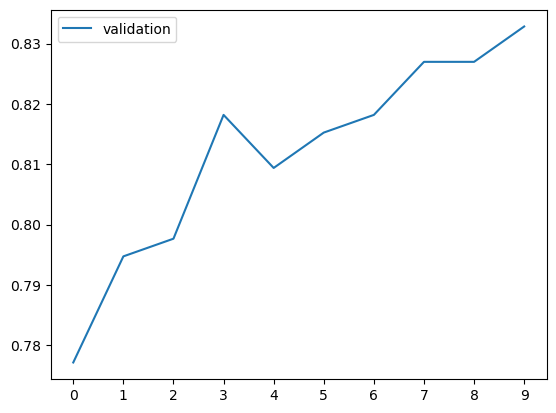

In [25]:
# plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.xticks(np.arange(10))
plt.legend()
plt.show();

## 8.6 Adjusting the learning rate


- What´s the learning rate?
- Trying different values


In [26]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights="imagenet", include_top=False, input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.legacy.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model

In [27]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(f"Training model with lr={lr}")

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

Training model with lr=0.0001
Epoch 1/10
96/96 [==============================] - 24s 232ms/step - loss: 1.9489 - accuracy: 0.3315 - val_loss: 1.5984 - val_accuracy: 0.4868
Epoch 2/10
96/96 [==============================] - 22s 227ms/step - loss: 1.4010 - accuracy: 0.5544 - val_loss: 1.2484 - val_accuracy: 0.5924
Epoch 3/10
96/96 [==============================] - 23s 235ms/step - loss: 1.1585 - accuracy: 0.6346 - val_loss: 1.0661 - val_accuracy: 0.6804
Epoch 4/10
96/96 [==============================] - 22s 228ms/step - loss: 1.0189 - accuracy: 0.6763 - val_loss: 0.9537 - val_accuracy: 0.7273
Epoch 5/10
96/96 [==============================] - 22s 229ms/step - loss: 0.9255 - accuracy: 0.7086 - val_loss: 0.8769 - val_accuracy: 0.7390
Epoch 6/10
96/96 [==============================] - 22s 227ms/step - loss: 0.8558 - accuracy: 0.7285 - val_loss: 0.8261 - val_accuracy: 0.7625
Epoch 7/10
96/96 [==============================] - 22s 229ms/step - loss: 0.8024 - accuracy: 0.7389 - val_loss:

Cell runtime without MPU:   51:23 min:sec

Cell runtime with MPU:      14:40 min:sec

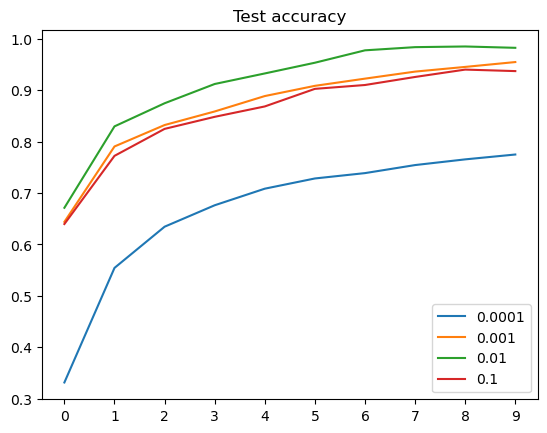

In [28]:
for lr, hist in scores.items():
    plt.plot(hist["accuracy"], label=lr)

plt.xticks(np.arange(10))
plt.title("Test accuracy")
plt.legend()
plt.show();

In [29]:
del scores[0.1]
del scores[0.0001]

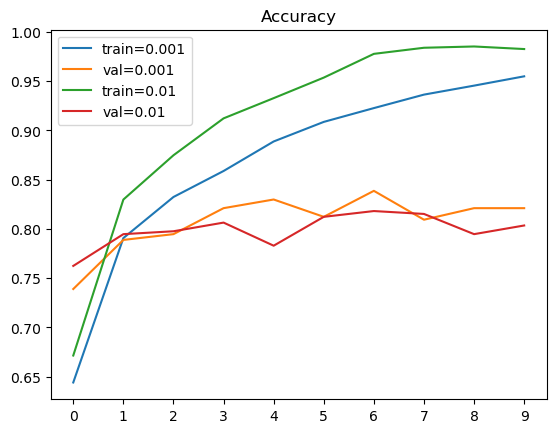

In [30]:
for lr, hist in scores.items():
    plt.plot(hist["accuracy"], label=("train=%s" % lr))
    plt.plot(hist["val_accuracy"], label=("val=%s" % lr))

plt.xticks(np.arange(10))
plt.title("Accuracy")
plt.legend()
plt.show();

Best learning rate: 0.001

In [31]:
learning_rate = 0.001

## 8.7 Checkpointing


- Saving the best model only
- Training a model with callbacks


In [32]:
model.save_weights("./models/model_v1.h5", save_format="h5")

In [58]:
# "xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5".format(epoch=3, val_accuracy=0.84)

'xception_v1_03_0.840.h5'

In [33]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,
    monitor="val_accuracy",
    mode="max",
)

In [34]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)
history = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/10
96/96 [==============================] - ETA: 0s - loss: 1.1008 - accuracy: 0.6307

/opt/homebrew/Caskroom/miniforge/base/envs/ML_Zoomcamp2024/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 25s 246ms/step - loss: 1.1008 - accuracy: 0.6307 - val_loss: 0.7104 - val_accuracy: 0.7830
Epoch 2/10
96/96 [==============================] - 22s 225ms/step - loss: 0.6310 - accuracy: 0.7855 - val_loss: 0.6145 - val_accuracy: 0.7977
Epoch 3/10
96/96 [==============================] - 22s 227ms/step - loss: 0.5051 - accuracy: 0.8334 - val_loss: 0.5760 - val_accuracy: 0.8065
Epoch 4/10
96/96 [==============================] - 21s 223ms/step - loss: 0.4328 - accuracy: 0.8598 - val_loss: 0.5673 - val_accuracy: 0.8065
Epoch 5/10
96/96 [==============================] - 24s 246ms/step - loss: 0.3753 - accuracy: 0.8905 - val_loss: 0.5492 - val_accuracy: 0.8240
Epoch 6/10
96/96 [==============================] - 24s 254ms/step - loss: 0.3279 - accuracy: 0.9071 - val_loss: 0.5486 - val_accuracy: 0.8152
Epoch 7/10
96/96 [==============================] - 27s 277ms/step - loss: 0.2910 - accuracy: 0.9234 - val_loss: 0.5228 - val_accuracy: 0.8270
Epoch 8/10

## 8.8 Adding more layers


- Adding one inner dense layer
- Experimenting with different sizes of inner layer


In [35]:
def make_model(learning_rate=0.01, size_inner=10):
    base_model = Xception(
        weights="imagenet", include_top=False, input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)

    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.legacy.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model


In [36]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(f"Training model with extra inner layer with size of = {size}")

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

Training model with extra inner layer with size of = 10
Epoch 1/10
96/96 [==============================] - 27s 241ms/step - loss: 1.4282 - accuracy: 0.5394 - val_loss: 0.9812 - val_accuracy: 0.6774
Epoch 2/10
96/96 [==============================] - 22s 227ms/step - loss: 0.8902 - accuracy: 0.6969 - val_loss: 0.8213 - val_accuracy: 0.7273
Epoch 3/10
96/96 [==============================] - 22s 230ms/step - loss: 0.7181 - accuracy: 0.7516 - val_loss: 0.7830 - val_accuracy: 0.7478
Epoch 4/10
96/96 [==============================] - 24s 249ms/step - loss: 0.6010 - accuracy: 0.8008 - val_loss: 0.6715 - val_accuracy: 0.7889
Epoch 5/10
96/96 [==============================] - 22s 228ms/step - loss: 0.5255 - accuracy: 0.8282 - val_loss: 0.6561 - val_accuracy: 0.7801
Epoch 6/10
96/96 [==============================] - 21s 222ms/step - loss: 0.4647 - accuracy: 0.8491 - val_loss: 0.6194 - val_accuracy: 0.7918
Epoch 7/10
96/96 [==============================] - 21s 223ms/step - loss: 0.4220 - ac

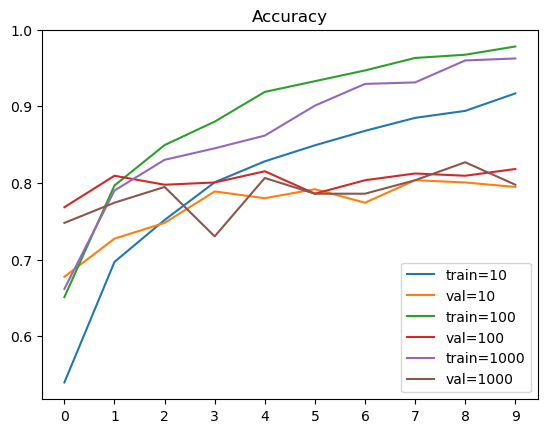

In [37]:
for size, hist in scores.items():
    plt.plot(hist["accuracy"], label=("train=%s" % size))
    plt.plot(hist["val_accuracy"], label=("val=%s" % size))

plt.xticks(np.arange(10))
plt.title("Accuracy")
plt.legend()
plt.show();

## 8.9 Regularization and dropout


- Regularization by freezing a part of the network
- Adding dropout to our model
- Experimenting with different values


In [38]:
def make_model(learning_rate=0.01, size_inner=10, droprate=0.5):
    base_model = Xception(
        weights="imagenet", include_top=False, input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.legacy.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model

In [39]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(f"Training model with droprate of = {droprate}")

    model = make_model(learning_rate=learning_rate, size_inner=size, droprate=droprate)
    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

Training model with droprate of = 0.0
Epoch 1/30
96/96 [==============================] - 26s 253ms/step - loss: 0.9906 - accuracy: 0.6741 - val_loss: 0.6812 - val_accuracy: 0.7801
Epoch 2/30
96/96 [==============================] - 22s 226ms/step - loss: 0.5769 - accuracy: 0.8054 - val_loss: 0.6359 - val_accuracy: 0.7859
Epoch 3/30
96/96 [==============================] - 21s 223ms/step - loss: 0.4177 - accuracy: 0.8537 - val_loss: 0.5456 - val_accuracy: 0.8152
Epoch 4/30
96/96 [==============================] - 21s 221ms/step - loss: 0.3414 - accuracy: 0.8885 - val_loss: 0.5588 - val_accuracy: 0.8065
Epoch 5/30
96/96 [==============================] - 22s 225ms/step - loss: 0.2500 - accuracy: 0.9201 - val_loss: 0.5418 - val_accuracy: 0.8270
Epoch 6/30
96/96 [==============================] - 21s 223ms/step - loss: 0.2013 - accuracy: 0.9410 - val_loss: 0.6156 - val_accuracy: 0.8006
Epoch 7/30
96/96 [==============================] - 21s 223ms/step - loss: 0.1602 - accuracy: 0.9518 - v

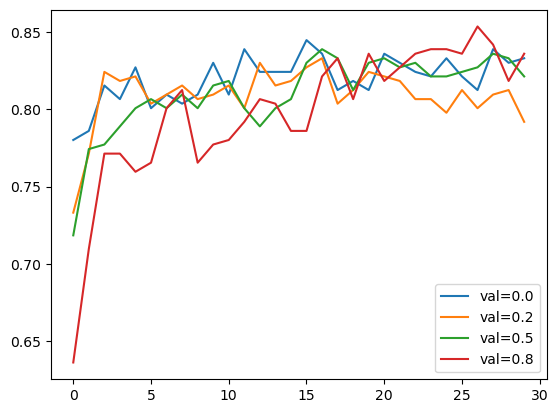

In [40]:
for droprate, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=("val=%s" % droprate))

plt.legend()
plt.show();

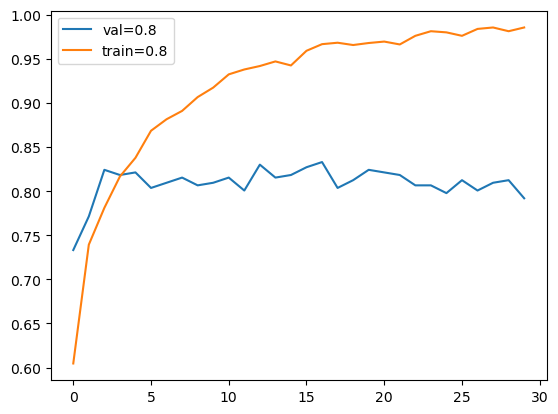

In [41]:
hist = scores[0.2]
plt.plot(hist["val_accuracy"], label=("val=%s" % droprate))
plt.plot(hist["accuracy"], label=("train=%s" % droprate))
plt.legend()
plt.show();

dropout: 0.2 seems to be the best value after ca. 5 epochs

## 8.10 Data augmentation


- Different data augmentations
- Training a model with augmentation
- How to select data augmentation?


In [42]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    "./clothing-dataset-small/train", target_size=(150, 150), batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    "./clothing-dataset-small/validation",
    target_size=(150, 150),
    batch_size=32,
    shuffle=False,
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [43]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate,
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 28s 275ms/step - loss: 1.5410 - accuracy: 0.5362 - val_loss: 0.8213 - val_accuracy: 0.7361
Epoch 2/50
96/96 [==============================] - 23s 234ms/step - loss: 1.1309 - accuracy: 0.6327 - val_loss: 0.7184 - val_accuracy: 0.7478
Epoch 3/50
96/96 [==============================] - 22s 231ms/step - loss: 0.9508 - accuracy: 0.6887 - val_loss: 0.6854 - val_accuracy: 0.7859
Epoch 4/50
96/96 [==============================] - 23s 242ms/step - loss: 0.9250 - accuracy: 0.6959 - val_loss: 0.6625 - val_accuracy: 0.7713
Epoch 5/50
96/96 [==============================] - 22s 224ms/step - loss: 0.8204 - accuracy: 0.7331 - val_loss: 0.6631 - val_accuracy: 0.7830
Epoch 6/50
96/96 [==============================] - 21s 223ms/step - loss: 0.7525 - accuracy: 0.7458 - val_loss: 0.6646 - val_accuracy: 0.7801
Epoch 7/50
96/96 [==============================] - 21s 222ms/step - loss: 0.7129 - accuracy: 0.7647 - val_loss: 0.6389 - val_accuracy: 0.7683

Choosing Augmentation:
- Use your own judgement
- Look at the dataset, what kind of variations are there?
  - Are the objects always centered?
    - rotate, shift
- Tune as a hyperparameter
  - train it for 10 - 20 epochs
  - Is it better?
    - Yes: use
    - No: don´t use
    - Same: train for more epochs (20) and evaluate again

Check tensorflow data, to speed up the process.

## 8.11 Training a larger model


- Train a 299x299 model


In [44]:
def make_model(input_size=150, learning_rate=0.01, size_inner=10, droprate=0.5):
    base_model = Xception(
        weights="imagenet", include_top=False, input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.legacy.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model

In [45]:
input_size = 299

In [46]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    "./clothing-dataset-small/train",
    target_size=(input_size, input_size),
    batch_size=32,
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    "./clothing-dataset-small/validation",
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False,
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [47]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,
    monitor="val_accuracy",
    mode="max",
)

In [48]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate,
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 90s 910ms/step - loss: 1.0673 - accuracy: 0.6473 - val_loss: 0.5464 - val_accuracy: 0.8328
Epoch 2/50
96/96 [==============================] - 85s 884ms/step - loss: 0.6509 - accuracy: 0.7692 - val_loss: 0.4666 - val_accuracy: 0.8328
Epoch 3/50
96/96 [==============================] - 85s 884ms/step - loss: 0.5563 - accuracy: 0.8103 - val_loss: 0.4532 - val_accuracy: 0.8446
Epoch 4/50
96/96 [==============================] - 84s 878ms/step - loss: 0.5130 - accuracy: 0.8286 - val_loss: 0.4171 - val_accuracy: 0.8563
Epoch 5/50
96/96 [==============================] - 84s 877ms/step - loss: 0.4571 - accuracy: 0.8475 - val_loss: 0.4407 - val_accuracy: 0.8299
Epoch 6/50
96/96 [==============================] - 84s 877ms/step - loss: 0.4354 - accuracy: 0.8514 - val_loss: 0.4334 - val_accuracy: 0.8240
Epoch 7/50
96/96 [==============================] - 85s 882ms/step - loss: 0.4259 - accuracy: 0.8501 - val_loss: 0.3915 - val_accuracy: 0.8651

## 8.12 Using the model


- Loading the model
- Evaluating the model
- Getting predictions


In [49]:
import tensorflow as tf
from tensorflow import keras

In [50]:
keras.models.load_model("./models/xception_v4_08_0.868.h5")

In [51]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.applications.xception import preprocess_input

In [52]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    "./clothing-dataset-small/test",
    target_size=(299, 299),
    batch_size=32,
    shuffle=False,
)

Found 372 images belonging to 10 classes.


In [53]:
model.evaluate(test_ds)

12/12 [==============================] - 10s 805ms/step - loss: 0.3382 - accuracy: 0.8952


[0.3382112979888916, 0.8951612710952759]

In [54]:
path = "clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg"

img = load_img(path, target_size=(299, 299))

In [55]:
import numpy as np

In [56]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [57]:
X = preprocess_input(X)

In [58]:
pred = model.predict(X)

1/1 [==============================] - 4s 4s/step


In [59]:
classes = [
    "dress",
    "hat",
    "longsleeve",
    "outwear",
    "pants",
    "shirt",
    "shoes",
    "shorts",
    "skirt",
    "t-shirt",
]

In [60]:
dict(zip(classes, pred[0]))

{'dress': -5.3480954,
 'hat': -10.295508,
 'longsleeve': -1.3886262,
 'outwear': -0.32779613,
 'pants': 16.319527,
 'shirt': -2.943788,
 'shoes': -7.355795,
 'shorts': 7.918832,
 'skirt': -3.2829309,
 't-shirt': -6.209003}

You can apply softmax to the predictions to get class.

## 8.13 Summary


- We can use pre-trained models for general image classification
- Convolutional layers let us turn an image into a vector
- Dense layers use the vector to make the predictions
- Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
- First, train a small model (150x150) before training a big one (299x299)
- Learning rate - how fast the model trains. Fast learners aren´t always best ones
- We can save the best model using callbacks and checkpoints
- To avoid overfitting, use dropout and augmentation

## 8.14 Explore more

- Add more data, e.g. Zalando, etc (ADD LINKS)
- Albumenations - another way of generating augmentations
- Use PyTorch or MXNet, MLX (Apple) instead of TensorFlow/Keras
- In addition to Xception, there are other architectures - try them

Other projects:
- cats vs dogs
- Hotdog vs not hotdog
- Category of images

Found intersting dataset:
